### 불균형 데이터 셋에서 정확도 추출

In [1]:
from sklearn.datasets import load_digits # 숫자 이미지 
from sklearn.model_selection import train_test_split # 데이터 분리
from sklearn.base import BaseEstimator # 모델 기본 알고리즘
from sklearn.metrics import accuracy_score # 정확도
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):# 상속
    def fit(self,X,y):
        pass # 학습 기능이 없다
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros( (len(X),1) , dtype=bool)

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환. 
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [2]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크리 :' , y_test.shape)
print('테스트세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

레이블 테스트 세트 크리 : (450,)
테스트세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64


In [3]:
# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

모든 예측을 0으로 하여도 정확도는:0.900


#### 3-2 Confusions Matrix

In [4]:
from sklearn.metrics import confusion_matrix

# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix출력
confusion_matrix(y_test , fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

#### 3-3 Precision과 Recall

In [5]:
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import recall_score # 재현율
from sklearn.metrics import confusion_matrix # 혼동행렬

In [6]:
# y_test : 원래답, pred : 예측값
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred) # 혼동행렬
    accuracy = accuracy_score(y_test , pred) # 정확도
    precision = precision_score(y_test , pred) # 정밀도
    recall = recall_score(y_test , pred) # 재현율
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [7]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression # 이진분류

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [9]:
# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./data/train.csv')
y_titanic_df = titanic_df['Survived'] # 원래답
X_titanic_df= titanic_df.drop('Survived', axis=1) # 원래답 삭제
X_titanic_df = transform_features(X_titanic_df) # 데이터 전처리

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression() # 객체 생성

lr_clf.fit(X_train , y_train) # 학습 -> Model(식) 생성
pred = lr_clf.predict(X_test) # 예측값 추출
get_clf_eval(y_test , pred) # 평가 : 정확도, 정밀도, 재현율

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\Users\dpqls\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
type(y_titanic_df)

pandas.core.series.Series

In [11]:
y_titanic_df.value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Precision/Recall Trade-off
- predict_proaba : 예측값 X, 예측 확률 출력

In [12]:
# 테스트 데이터 : X_test, 예측 확률 출력
pred_proba = lr_clf.predict_proba(X_test)
# 테스트데이터 : X_test, 예측값 출력
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))

pred_proba()결과 Shape : (179, 2)


In [13]:
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46185119 0.53814881]
 [0.87872149 0.12127851]
 [0.87720969 0.12279031]]


In [14]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
# X_test : 179 명의 데이터 (테스트데이터)
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 
print(pred_proba_class1) # 살 확률

[0.53814881 0.12127851 0.12279031 0.11735566 0.14476333 0.11774268
 0.11153882 0.79120777 0.21711717 0.63060653 0.10018136 0.124975
 0.12279629 0.11158477 0.56339683 0.1409667  0.09626376 0.26651026
 0.27527809 0.82818596 0.24633775 0.38089837 0.14532747 0.18519899
 0.11195584 0.23443251 0.14030812 0.07410331 0.28033375 0.30454209
 0.94727297 0.81734339 0.12686242 0.82607096 0.39953314 0.23443251
 0.07236526 0.6111051  0.05294352 0.10388055 0.35071208 0.08330623
 0.82176758 0.70780888 0.63046967 0.63048598 0.9188861  0.35851184
 0.94889699 0.11199041 0.59279118 0.11158477 0.13274287 0.72537149
 0.30925202 0.19685294 0.22630543 0.12279135 0.15414605 0.43227956
 0.28004156 0.10074474 0.54542705 0.513976   0.44434946 0.09456657
 0.6667791  0.59411571 0.95181154 0.1481204  0.12886652 0.16838377
 0.10388279 0.94800035 0.19858392 0.11158477 0.34804089 0.18361778
 0.83560709 0.12279135 0.79484541 0.64524895 0.93105098 0.13313537
 0.94895012 0.95039398 0.15346306 0.12543586 0.87438414 0.111584

In [15]:
# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

반환된 분류 결정 임곗값 배열의 Shape: (143,)


In [16]:
thresholds[133:]

array([0.92882036, 0.93105098, 0.94727297, 0.94796073, 0.94800035,
       0.94889699, 0.94895012, 0.95039398, 0.95181154, 0.96509854])

In [17]:
#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
# thresholds.shape[0] : (143,)
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]


In [18]:
# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


#### 정밀도, 재현율 그래프

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [20]:
def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    #          X축값         Y축값
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

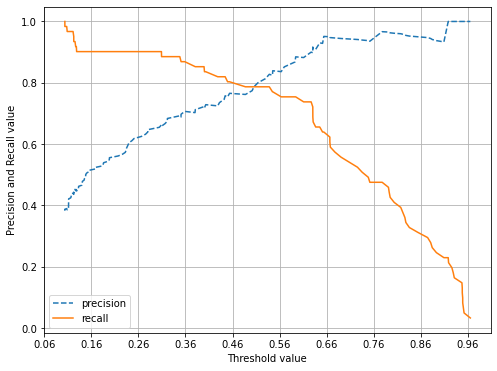

In [21]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1])

#### 3.4 F1 Score

In [22]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


In [32]:
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

ROC Curve와 AUC

In [33]:
from sklearn.metrics import roc_curve


In [34]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)

In [35]:
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50]
샘플용 10개의 임곗값:  [1.97 0.75 0.63 0.59 0.49 0.4  0.35 0.23 0.13 0.12 0.11]


In [36]:
# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 임곗값별 FPR:  [0.    0.017 0.034 0.051 0.127 0.161 0.203 0.331 0.585 0.636 0.797]
샘플 임곗값별 TPR:  [0.    0.475 0.689 0.754 0.787 0.836 0.869 0.902 0.918 0.967 0.967]


In [37]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    # 'k--' : k -> black
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

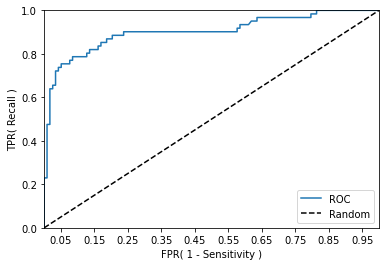

In [38]:
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [39]:
from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8341


- AUC 값이 0.8341이라는 것은 ROC의 면적이라는 의미
- AUC의 점수가 높다는 것은 좋은 모델이라는 의미

In [40]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred) # 혼돈 행렬
    accuracy = accuracy_score(y_test , pred) # 정확도
    precision = precision_score(y_test , pred) # 정밀도
    recall = recall_score(y_test , pred) # 재현율
    f1 = f1_score(y_test,pred) # f1-score 
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred) # AUC 점수
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))